In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# import gamma function and incomplete gamma function
from scipy.special import gamma, gammainc

In [58]:
def gaussian_to_sphere(X: torch.Tensor) -> torch.Tensor:
    # Convert a multivariate gaussian of any dimension d to a d-dimensional sphere
    d = X.shape[1]
    # Compute the norm of each row
    norm = torch.norm(X, dim=1, keepdim=True)

    # compute cdf of each point
    cdf = gammainc(d/2, norm**2/2)

    # calculate the new point with the adjusted radius
    X_sphere = X / norm * cdf
    return X_sphere
    

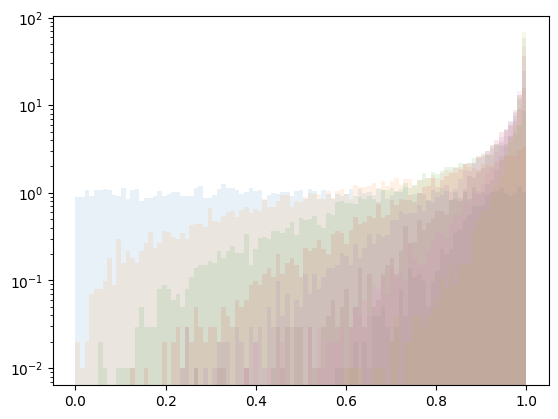

In [73]:
import LAMINAR
for i in range(1, 10):
    X = torch.randn(10000, i)
    #X_sphere = gaussian_to_sphere(X)
    X_sphere = LAMINAR.utils.gaussian_to_sphere(X)
    radii = torch.norm(X_sphere, dim=1)
    counts = plt.hist(radii.numpy(), bins=np.linspace(0, 1, 100), density=True, alpha=0.1);

plt.yscale('log')

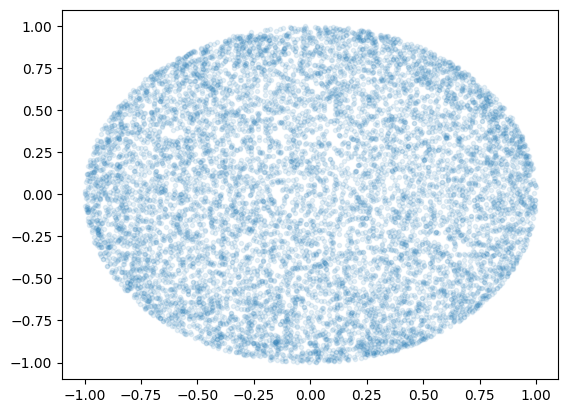

In [76]:
X = torch.randn(10000, 2)
X_sphere = LAMINAR.utils.gaussian_to_sphere(X)
plt.scatter(X_sphere[:, 0], X_sphere[:, 1], marker='.', alpha=0.1)

In [174]:
from scipy.spatial import kdtree

In [207]:
d2 = {}

C:\Users\Chris\AppData\Local\Temp\ipykernel_14700\2631017031.py:16: DeprecationWarning: Please import `KDTree` from the `scipy.spatial` namespace; the `scipy.spatial.kdtree` namespace is deprecated and will be removed in SciPy 2.0.0.
  kd = kdtree.KDTree(X_sphere.numpy())
h:\Uni\Master\Thesis\NFLAM\NFLAM\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
h:\Uni\Master\Thesis\NFLAM\NFLAM\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
h:\Uni\Master\Thesis\NFLAM\NFLAM\.venv\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
h:\Uni\Master\Thesis\NFLAM\NFLAM\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, d

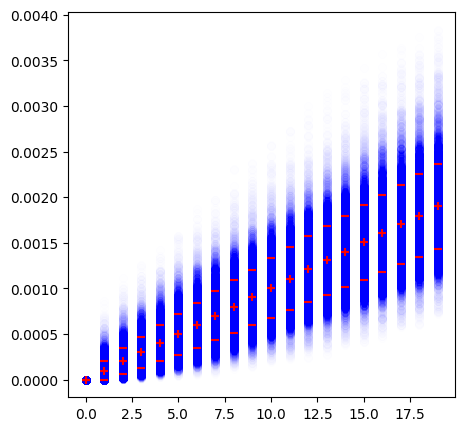

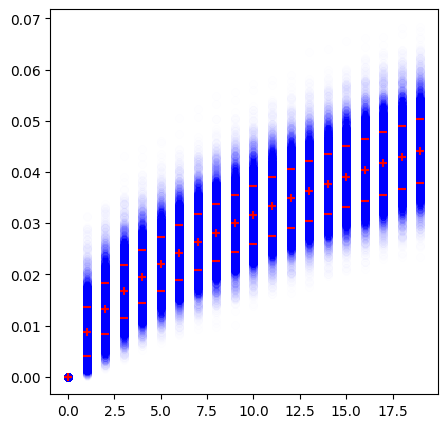

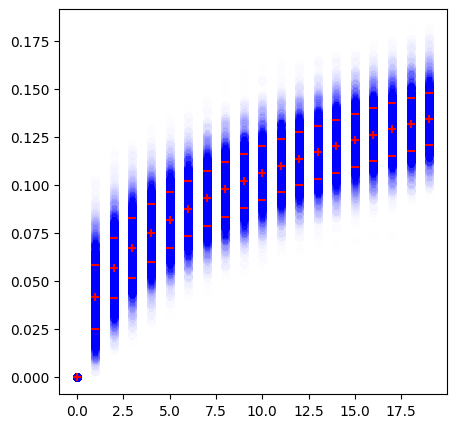

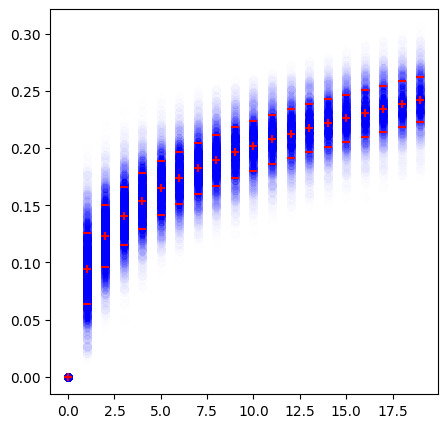

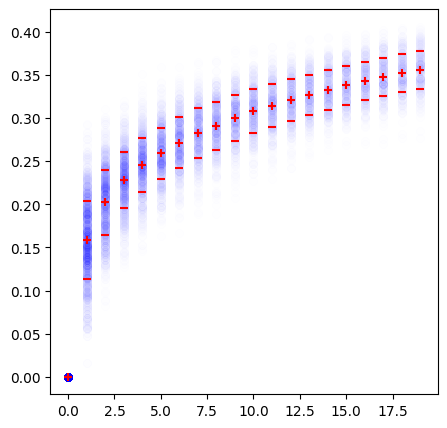

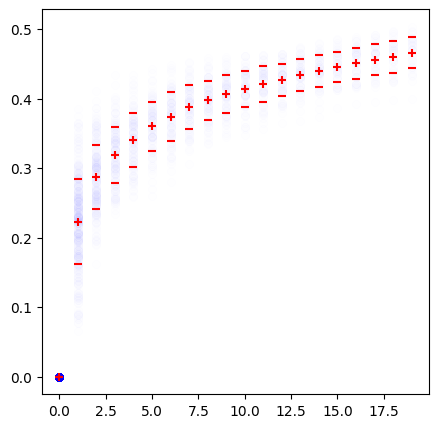

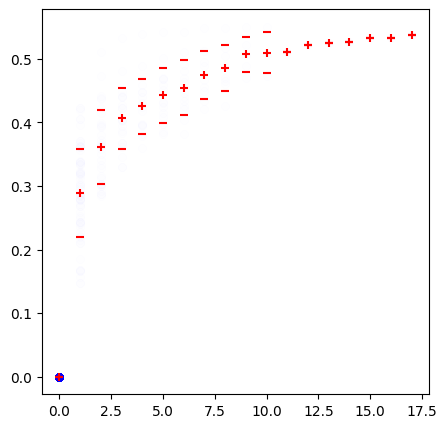

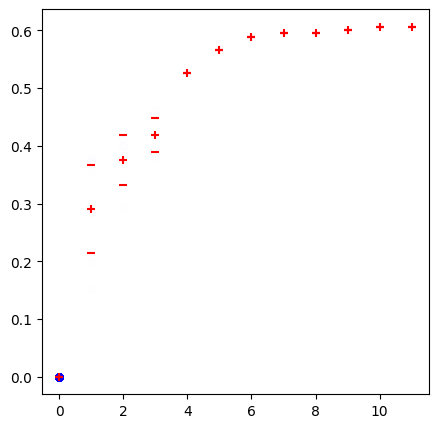

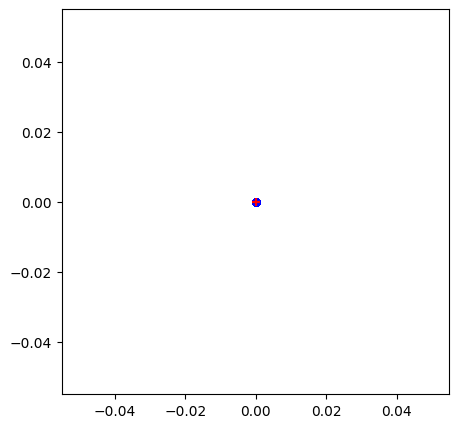

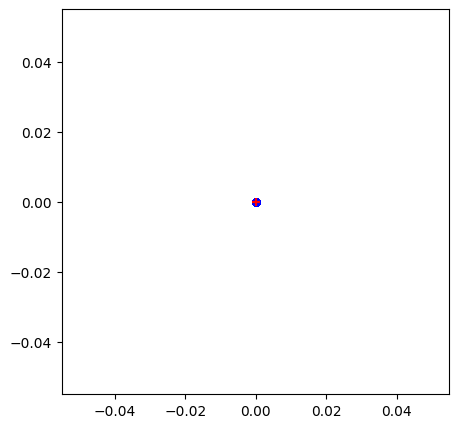

In [212]:
for n in range(1, 11):
    d[n] = [[] for _ in range(20)]
    X = torch.randn(10000, n)
    X_sphere = LAMINAR.utils.gaussian_to_sphere(X)

    # uniform sampling via acceptance rejection
    #X_sphere = []
#
    #while len(X_sphere) < 100000:
    #    x = torch.rand(1, n) * 2 - 1
    #    if torch.norm(x) <= 1:
    #        X_sphere.append(x)
#
    #X_sphere = torch.cat(X_sphere, dim=0)

    kd = kdtree.KDTree(X_sphere.numpy())
    distances, indices = kd.query(X_sphere.numpy(), k=20)


    dict = {
        i: [] for i in range(20)
    }

    for i in range(10000):
        for j in range(20):
            if torch.norm(X_sphere[i]) + distances[i, j] <= 1:
                dict[j].append(distances[i, j])
                
    plt.figure(figsize=(5, 5))
    for i in range(20):
        plt.scatter(np.ones(len(dict[i])) * i, dict[i], color='blue', alpha=0.005)
        plt.scatter(i, np.mean(dict[i]), color='red', marker='+')
        plt.scatter(i, np.mean(dict[i]) + np.std(dict[i]), color='red', marker='_')
        plt.scatter(i, np.mean(dict[i]) - np.std(dict[i]), color='red', marker='_')

        # save mean an std in d
        d[n][i].append((np.mean(dict[i]), np.std(dict[i])))

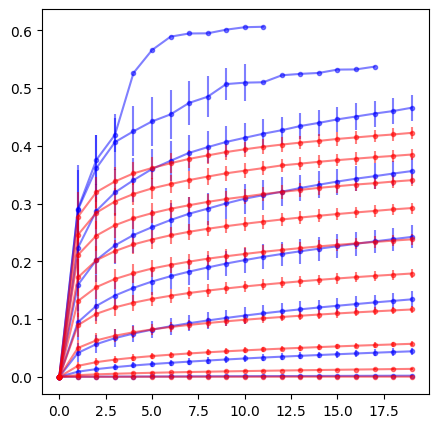

In [213]:
# plot all the means and stds from d
plt.figure(figsize=(5, 5))
for i in range(1, 11):
    means = [x[0][0] for x in d[i]]
    stds = [x[0][1] for x in d[i]]
    plt.errorbar(range(20), means, yerr=stds, alpha=0.5, fmt='b.-')

for i in range(1, 11):
    means = [x[0][0] for x in d2[i]]
    stds = [x[0][1] for x in d2[i]]
    plt.errorbar(range(20), means, yerr=stds, alpha=0.5, fmt='r.-')


In [214]:
d

{1: [[(0.0, 0.0)],
  [(9.985121026827414e-05, 0.0001005914558950081)],
  [(0.0002014322186441699, 0.00014267622701328152)],
  [(0.00029877381899644283, 0.00017078346909974763)],
  [(0.0003984482542403404, 0.00019867927933202526)],
  [(0.000498888872851604, 0.000224037901174423)],
  [(0.0005976874429781038, 0.00024645036643384296)],
  [(0.0006995707183509498, 0.0002671883533919881)],
  [(0.0008022960003193195, 0.00028692669802527404)],
  [(0.0009015293400117449, 0.0003045160190305298)],
  [(0.001006097427919613, 0.0003246436646657769)],
  [(0.0011091192082034562, 0.00034296019096203786)],
  [(0.0012105452996465523, 0.0003599143857772739)],
  [(0.0013069699391998766, 0.000376476573840173)],
  [(0.0014037063137316143, 0.0003896921768816663)],
  [(0.001503773081379059, 0.0004069070655293461)],
  [(0.0016036145997336403, 0.0004222778190525408)],
  [(0.0017020478583428254, 0.0004370608034553213)],
  [(0.0017994534537014038, 0.00045006261303328764)],
  [(0.001899374367478854, 0.00046250591747